# WeatherPy


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
api_key = ''

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city = city.replace(' ', '%20')
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key 
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print('-' * 30)
print('Beginning API Data Retieval')

for city in cities:
    try:
        response = requests.get(f'{url}&q={city}').json() 
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind_speed.append(response['wind']['speed'])
        city_record = response['name']
        print(f'Processing Record {record} | {city_record}')
        
        record= record + 1
        
    except:
        print('City not found. Skipping...')
    continue

------------------------------
Beginning API Data Retieval
City not found. Skipping...
Processing Record 1 | Cabo San Lucas
Processing Record 2 | Muisne
City not found. Skipping...
Processing Record 3 | Rikitea
Processing Record 4 | Vestmannaeyjar
Processing Record 5 | Punta Arenas
Processing Record 6 | Albany
Processing Record 7 | Cedral
Processing Record 8 | Eureka
Processing Record 9 | Yellowknife
Processing Record 10 | Cape Town
Processing Record 11 | Mataura
Processing Record 12 | Saint-Philippe
Processing Record 13 | Saskylakh
Processing Record 14 | Tasiilaq
Processing Record 15 | Hasaki
City not found. Skipping...
Processing Record 16 | Kalety
Processing Record 17 | Vao
City not found. Skipping...
Processing Record 18 | Honiara
Processing Record 19 | Den Helder
Processing Record 20 | Rach Gia
Processing Record 21 | Fairbanks
City not found. Skipping...
Processing Record 22 | Mar del Plata
Processing Record 23 | Hilo
Processing Record 24 | Mahebourg
Processing Record 25 | Klaksvi

Processing Record 228 | Sibu
Processing Record 229 | Wanning
Processing Record 230 | Oranjemund
Processing Record 231 | Siteki
Processing Record 232 | Moree
Processing Record 233 | Viedma
Processing Record 234 | Nabire
Processing Record 235 | Aanekoski
Processing Record 236 | Ormara
City not found. Skipping...
Processing Record 237 | Arica
Processing Record 238 | Richards Bay
City not found. Skipping...
Processing Record 239 | Turukhansk
Processing Record 240 | Vila Franca do Campo
Processing Record 241 | Yulara
Processing Record 242 | Sakaiminato
Processing Record 243 | Panama City
City not found. Skipping...
Processing Record 244 | Tateyama
Processing Record 245 | Taltal
Processing Record 246 | Fare
Processing Record 247 | Abalak
Processing Record 248 | Kofele
City not found. Skipping...
City not found. Skipping...
Processing Record 249 | Mount Gambier
Processing Record 250 | Lauria
Processing Record 251 | Vestmanna
Processing Record 252 | Narsaq
City not found. Skipping...
Processin

Processing Record 449 | Zabaykalsk
Processing Record 450 | Nizhniy Kuranakh
Processing Record 451 | Drumheller
Processing Record 452 | Oksfjord
Processing Record 453 | Bam
Processing Record 454 | Goma
Processing Record 455 | Ladario
Processing Record 456 | Pangnirtung
Processing Record 457 | Marzuq
Processing Record 458 | Hun
City not found. Skipping...
Processing Record 459 | Cayenne
Processing Record 460 | Parabel
Processing Record 461 | Zhanaozen
Processing Record 462 | Xiongyue
Processing Record 463 | Cherepanovo
Processing Record 464 | Eyl
Processing Record 465 | Nishihara
Processing Record 466 | Marsa Matruh
Processing Record 467 | Williams Lake
City not found. Skipping...
Processing Record 468 | Aguilas
Processing Record 469 | Chokurdakh
Processing Record 470 | Nouakchott
Processing Record 471 | Matagami
Processing Record 472 | Shakhtinsk
City not found. Skipping...
Processing Record 473 | Wawa
City not found. Skipping...
Processing Record 474 | Mareeba
Processing Record 475 | D

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    'City': city_name,
    'Cloudiness':cloudiness, 
    'Country':country,
    'Date':date, 
    'Humidity': humidity,
    'Lat':lat, 
    'Lng':lng, 
    'Max Temp': max_temp,
    'Wind Speed':wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [5]:
weather_data.to_csv('Output/weatherdata.csv')

In [6]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cabo San Lucas,5,MX,1547423400,64,22.89,-109.91,77.00,4.70
1,Muisne,88,EC,1547428284,91,0.61,-80.02,74.13,3.09
2,Rikitea,92,PF,1547427867,100,-23.12,-134.97,79.66,12.37
3,Vestmannaeyjar,48,IS,1547428117,100,63.44,-20.27,28.77,3.98
4,Punta Arenas,0,CL,1547424000,50,-53.16,-70.91,53.60,19.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

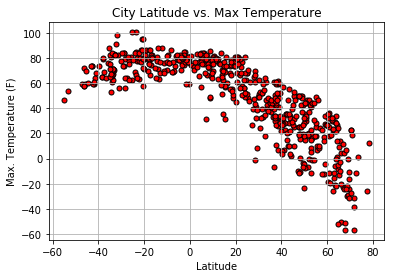

In [7]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], color= 'red', edgecolor = 'black', s=25)
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max. Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('Output/Max_Temp_vs_Latitude.png')

plt.show()

#### Latitude vs. Humidity Plot

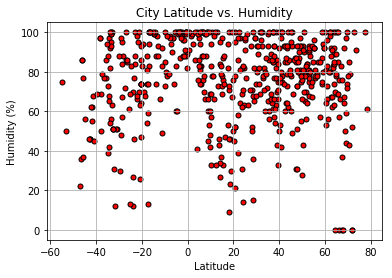

In [8]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], color= 'red', edgecolor = 'black', s=25)
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('Output/Humidity_vs_Latitude.png')

plt.show()

#### Latitude vs. Cloudiness Plot

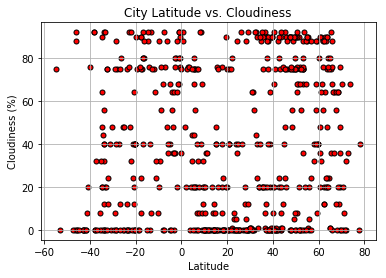

In [9]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], color= 'red', edgecolor = 'black', s=25)
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('Output/Cloudiness_vs_Latitude.png')

plt.show()

#### Latitude vs. Wind Speed Plot

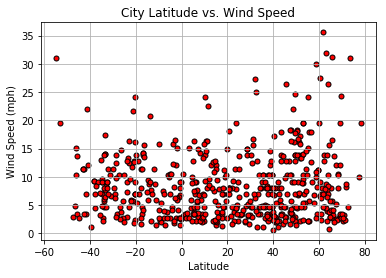

In [10]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], color= 'red', edgecolor = 'black', s=25)

plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('Output/Wind_Speed_vs_Latitude.png')

plt.show()

Analysis

This analysis is for weather data taken on January 13, 2019.

Since the data was taken less than a month after the summer solstice in the Southern Hemisphere, we can see that cities on or very near the equator did experience the highest temperatures.  It can be concluded that the highest temperatures are coorilated to the amount of sunshine received.
Percent humidity doesn't seem to have much correlation to latitude. Though the cities on the equator experienced humidity well above 50% to 100% range, cities just north of the equator fell to levels well below 50%.
No significant correlation was found between latitude and cloud cover or wind speed. The highest wind speeds were recorded in the latitudes at or above 60 and below -40, and higher speeds tend to show more in the north, which can possibly be correlated to the amount of sun received as well.  Cloud cover seemed to be evenly distributed accross the range of latitudes.